### **Este notebook realiza uma análise exploratória e multivariada dos dados de arrecadação tributária no Brasil, com foco em identificar padrões, tendências e insights relevantes. Ele inclui:**

1. **Pré-processamento dos dados**: Tratamento de valores ausentes e normalização das variáveis.
2. **Análise descritiva**: Exploração de tendências temporais, padrões sazonais e eventos econômicos significativos.
3. **Análise de correlação**: Identificação de relações entre diferentes tipos de impostos.
4. **Clusterização**: Agrupamento dos estados brasileiros com base em perfis de arrecadação.
5. **Redução de dimensionalidade (PCA)**: Visualização dos clusters em componentes principais.
6. **Visualizações**: Gráficos detalhados para facilitar a interpretação dos resultados.

O objetivo é compreender melhor os fatores que influenciam a arrecadação tributária e identificar diferenças regionais e temporais.

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [89]:
df = pd.read_csv('Base dos Dados - Resultado da Arrecadacao.csv')

In [90]:
df.head()

,ano,mes,sigla_uf,imposto_importacao,imposto_exportacao,ipi_fumo,ipi_bebidas,ipi_automoveis,ipi_importacoes,ipi_outros,irpf,irpj_entidades_financeiras,irpj_demais_empresas,irrf_rendimentos_trabalho,irrf_rendimentos_capital,irrf_remessas_exterior,irrf_outros_rendimentos,iof,itr,ipmf,cpmf,cofins,cofins_entidades_financeiras,cofins_demais_empresas,pis_pasep,pis_pasep_entidades_financeiras,pis_pasep_demais_empresas,csll,csll_entidades_financeiras,csll_demais_empresas,cide_combustiveis_parcela_nao_dedutivel,cide_combustiveis,cpsss_1,cpsss_2,contribuicao_fundaf,refis,paes,retencoes_fonte,pagamento_unificado,outras_receitas_rfb,demais_receitas,receita_previdenciaria,receita_previdenciaria_propria,receita_previdenciaria_demais,receitas_outros_orgaos
0,2019,1,AC,75614.39,0.00,0.0,405772.77,0.00,43.50,38359.94,2560813.94,158.15,12755126.70,9843425.29,1559908.59,12505.50,575056.94,251450.89,50327.84,NaN,NaN,NaN,10447.97,14848891.55,NaN,1695.87,5586943.38,NaN,1855.08,8618908.71,NaN,0.0,NaN,6941312.74,NaN,NaN,NaN,NaN,NaN,566326.76,NaN,9.482679e+07,NaN,NaN,6.194045e+05
1,2019,2,AC,74008.64,107.06,0.0,115919.43,11017.74,2913.20,20848.47,1896771.08,3327.33,5676305.28,7476245.77,863911.93,790.92,448648.29,421152.34,39200.88,NaN,NaN,NaN,10110.95,10233981.21,NaN,1592.39,3585452.31,NaN,5441.42,3542820.82,NaN,0.0,NaN,6746692.49,NaN,NaN,NaN,NaN,NaN,430579.10,NaN,8.101877e+07,NaN,NaN,1.068504e+06
2,2019,3,AC,368388.57,0.00,0.0,236585.19,11501.16,701344.08,24110.04,1929616.57,9389.81,5070847.82,7903838.64,967366.03,919.10,469695.29,305246.62,16380.43,NaN,NaN,NaN,15194.25,9331142.51,NaN,2463.32,3264074.02,NaN,7294.73,3383377.06,NaN,0.0,NaN,6790391.80,NaN,NaN,NaN,NaN,NaN,454062.07,NaN,8.392409e+07,NaN,NaN,6.926233e+05
3,2019,9,AC,6236.47,11.74,0.0,164211.93,24574.15,0.00,31486.02,6111147.40,6877.97,5616525.58,8283401.18,496790.60,5864.50,1033134.93,404055.67,680926.70,NaN,NaN,NaN,26141.74,10782277.81,NaN,4240.08,4639904.79,NaN,7559.58,3722517.56,NaN,0.0,NaN,6980353.33,NaN,NaN,NaN,NaN,NaN,140724.26,NaN,1.242954e+08,NaN,NaN,5.476817e+05
4,2019,6,AC,4170.46,12.50,0.0,146149.46,12084.18,0.00,32599.61,7091844.10,5286.09,5074422.61,8033565.29,538903.78,440195.37,804014.35,586990.33,21746.31,NaN,NaN,NaN,13524.74,8743534.07,NaN,2179.99,3124456.28,NaN,6595.29,3293680.13,NaN,0.0,NaN,6814164.74,NaN,NaN,NaN,NaN,NaN,392009.05,NaN,1.264125e+08,NaN,NaN,5.772982e+05


In [91]:
df.columns

Index(['ano', 'mes', 'sigla_uf', 'imposto_importacao', 'imposto_exportacao',
       'ipi_fumo', 'ipi_bebidas', 'ipi_automoveis', 'ipi_importacoes',
       'ipi_outros', 'irpf', 'irpj_entidades_financeiras',
       'irpj_demais_empresas', 'irrf_rendimentos_trabalho',
       'irrf_rendimentos_capital', 'irrf_remessas_exterior',
       'irrf_outros_rendimentos', 'iof', 'itr', 'ipmf', 'cpmf', 'cofins',
       'cofins_entidades_financeiras', 'cofins_demais_empresas', 'pis_pasep',
       'pis_pasep_entidades_financeiras', 'pis_pasep_demais_empresas', 'csll',
       'csll_entidades_financeiras', 'csll_demais_empresas',
       'cide_combustiveis_parcela_nao_dedutivel', 'cide_combustiveis',
       'cpsss_1', 'cpsss_2', 'contribuicao_fundaf', 'refis', 'paes',
       'retencoes_fonte', 'pagamento_unificado', 'outras_receitas_rfb',
       'demais_receitas', 'receita_previdenciaria',
       'receita_previdenciaria_propria', 'receita_previdenciaria_demais',
       'receitas_outros_orgaos'],
      dt

In [92]:
df.isnull().sum()

ano                                           0
mes                                           0
sigla_uf                                      0
imposto_importacao                            0
imposto_exportacao                            0
ipi_fumo                                      0
ipi_bebidas                                   0
ipi_automoveis                                0
ipi_importacoes                               0
ipi_outros                                    0
irpf                                          0
irpj_entidades_financeiras                    0
irpj_demais_empresas                          0
irrf_rendimentos_trabalho                     0
irrf_rendimentos_capital                      0
irrf_remessas_exterior                        0
irrf_outros_rendimentos                       0
iof                                           0
itr                                           0
ipmf                                       7263
cpmf                                    

In [93]:
df.nunique()

ano                                          25
mes                                          12
sigla_uf                                     27
imposto_importacao                         7883
imposto_exportacao                         6213
ipi_fumo                                   4827
ipi_bebidas                                7240
ipi_automoveis                             4339
ipi_importacoes                            7303
ipi_outros                                 7909
irpf                                       7911
irpj_entidades_financeiras                 7170
irpj_demais_empresas                       7911
irrf_rendimentos_trabalho                  7911
irrf_rendimentos_capital                   7909
irrf_remessas_exterior                     7697
irrf_outros_rendimentos                    7909
iof                                        7843
itr                                        7905
ipmf                                          1
cpmf                                    

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ano                                      7911 non-null   int64  
 1   mes                                      7911 non-null   int64  
 2   sigla_uf                                 7911 non-null   object 
 3   imposto_importacao                       7911 non-null   float64
 4   imposto_exportacao                       7911 non-null   float64
 5   ipi_fumo                                 7911 non-null   float64
 6   ipi_bebidas                              7911 non-null   float64
 7   ipi_automoveis                           7911 non-null   float64
 8   ipi_importacoes                          7911 non-null   float64
 9   ipi_outros                               7911 non-null   float64
 10  irpf                                     7911 no

# Descrição das Colunas do DataFrame

## Identificação Temporal e Geográfica

- **ano**: Ano do registro de dados fiscais
- **mes**: Mês do registro
- **sigla_uf**: Sigla da Unidade Federativa brasileira

## Impostos sobre Comércio Exterior

- **imposto_importacao**: Valores coletados pelo imposto sobre produtos importados
- **imposto_exportacao**: Valores coletados pelo imposto sobre produtos exportados

## Impostos sobre Produtos Industrializados (IPI)

- **ipi_fumo**: IPI sobre produtos de tabaco/fumo
- **ipi_bebidas**: IPI sobre bebidas
- **ipi_automoveis**: IPI sobre automóveis
- **ipi_importacoes**: IPI sobre produtos importados
- **ipi_outros**: IPI sobre outros produtos não categorizados

## Impostos de Renda

- **irpf**: Imposto de Renda Pessoa Física
- **irpj_entidades_financeiras**: Imposto de Renda Pessoa Jurídica para instituições financeiras
- **irpj_demais_empresas**: Imposto de Renda Pessoa Jurídica para outras empresas
- **irrf_rendimentos_trabalho**: Imposto de Renda Retido na Fonte sobre rendimentos do trabalho
- **irrf_rendimentos_capital**: Imposto de Renda Retido na Fonte sobre rendimentos de capital
- **irrf_remessas_exterior**: Imposto de Renda Retido na Fonte sobre remessas ao exterior
- **irrf_outros_rendimentos**: Imposto de Renda Retido na Fonte sobre outros rendimentos

## Outros Impostos e Contribuições

- **iof**: Imposto sobre Operações Financeiras
- **itr**: Imposto Territorial Rural
- **ipmf**: Imposto Provisório sobre Movimentação Financeira
- **cpmf**: Contribuição Provisória sobre Movimentação Financeira

## Contribuições Sociais

- **cofins**: Contribuição para o Financiamento da Seguridade Social
- **cofins_entidades_financeiras**: COFINS para instituições financeiras
- **cofins_demais_empresas**: COFINS para outras empresas
- **pis_pasep**: Programa de Integração Social/Programa de Formação do Patrimônio do Servidor Público
- **pis_pasep_entidades_financeiras**: PIS/PASEP para instituições financeiras
- **pis_pasep_demais_empresas**: PIS/PASEP para outras empresas
- **csll**: Contribuição Social sobre o Lucro Líquido
- **csll_entidades_financeiras**: CSLL para instituições financeiras
- **csll_demais_empresas**: CSLL para outras empresas

## Outros Tributos e Contribuições

- **cide_combustiveis_parcela_nao_dedutivel**: Parcela não dedutível da CIDE-Combustíveis
- **cide_combustiveis**: Contribuição de Intervenção no Domínio Econômico sobre Combustíveis
- **cpsss_1**: Contribuição para o Plano de Seguridade Social do Servidor - Tipo 1
- **cpsss_2**: Contribuição para o Plano de Seguridade Social do Servidor - Tipo 2
- **contribuicao_fundaf**: Contribuição para o Fundo Especial de Desenvolvimento e Aperfeiçoamento das Atividades de Fiscalização

## Programas de Refinanciamento

- **refis**: Programa de Recuperação Fiscal
- **paes**: Parcelamento Especial

## Outras Receitas

- **retencoes_fonte**: Retenções na fonte não especificadas anteriormente
- **pagamento_unificado**: Pagamentos unificados de tributos
- **outras_receitas_rfb**: Outras receitas da Receita Federal do Brasil
- **demais_receitas**: Demais receitas não categorizadas

## Receitas Previdenciárias

- **receita_previdenciaria**: Total de receitas previdenciárias
- **receita_previdenciaria_propria**: Receitas previdenciárias próprias
- **receita_previdenciaria_demais**: Outras receitas previdenciárias

## Outras

- **receitas_outros_orgaos**: Receitas de outros órgãos

## Análise Univariada

### **Distribuição de Receitas**

Qual é a distribuição estatística do IRPF (Imposto de Renda Pessoa Física) ao longo dos anos no conjunto de dados?

In [95]:
df.ano.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7911 entries, 0 to 7910
Series name: ano
Non-Null Count  Dtype
--------------  -----
7911 non-null   int64
dtypes: int64(1)
memory usage: 61.9 KB


In [96]:
df.irpf.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7911 entries, 0 to 7910
Series name: irpf
Non-Null Count  Dtype  
--------------  -----  
7911 non-null   float64
dtypes: float64(1)
memory usage: 61.9 KB


In [97]:
df['irpf_mi'] = df['irpf'] / 1000000

In [98]:
ano_irpf = df.groupby('ano')['irpf_mi'].describe().reset_index().sort_values(by='ano', ascending=True)
ano_irpf

,ano,count,mean,std,min,25%,50%,75%,max
0,2000,324.0,11.277346,29.644302,0.067719,0.695912,2.131718,6.799070,318.041733
1,2001,324.0,3.514211,7.513506,0.000104,0.029937,0.960042,3.574911,80.613082
2,2002,324.0,0.013771,0.036748,0.000120,0.000872,0.002896,0.008583,0.433879
3,2003,324.0,15.757868,42.788616,0.135563,1.029098,3.035316,9.780135,501.736441
4,2004,324.0,18.937845,50.233194,0.087131,1.156245,3.581655,11.688643,562.559584
5,2005,324.0,22.657006,64.197087,0.121721,1.498559,4.565961,14.089274,800.197554
6,2006,324.0,26.312174,69.706381,0.160408,2.129787,6.192499,17.121780,823.683794
7,2007,324.0,42.144474,111.566648,0.277673,3.021364,8.715201,24.498337,984.652874
8,2008,324.0,46.254486,120.159441,0.395069,3.751242,10.049805,29.530180,1291.772797
9,2009,324.0,45.803464,114.560331,0.508887,4.140796,10.816211,30.582289,1186.250292


In [99]:
cols_ano = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

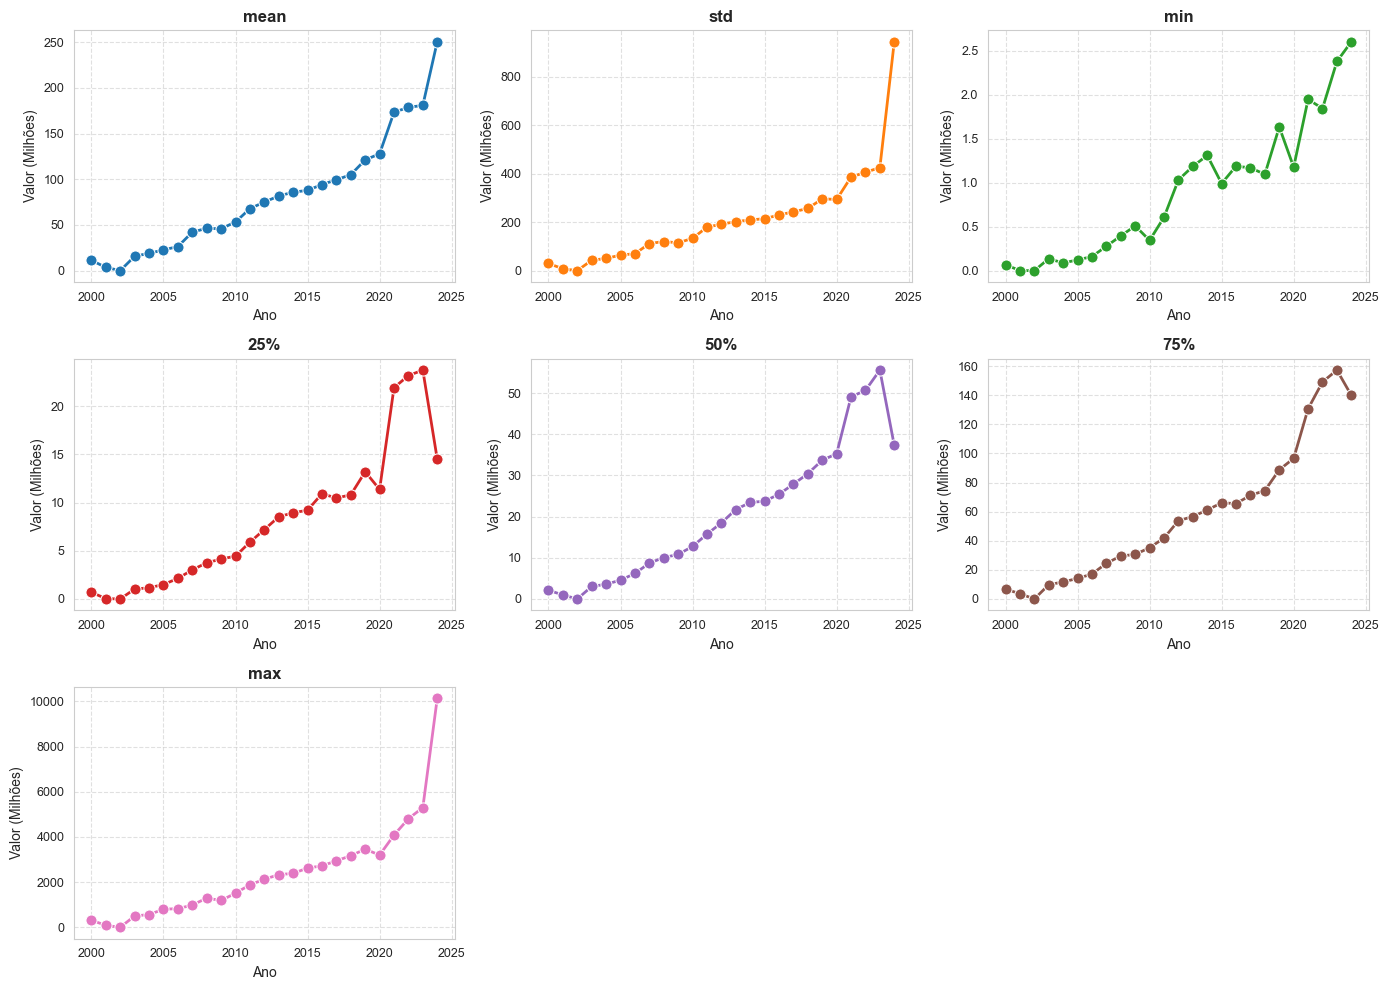

In [100]:
# Melhorando a visualização
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))
colors = sns.color_palette("tab10", len(cols_ano))

for i, (col, color) in enumerate(zip(cols_ano, colors), 1):
    plt.subplot(3, 3, i)
    sns.lineplot(data=ano_irpf, x='ano', y=col, marker='o', linewidth=2, markersize=8, color=color)
    plt.title(col, fontsize=12, fontweight='bold')
    plt.xlabel("Ano", fontsize=10)
    plt.ylabel("Valor (Milhões)", fontsize=10)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

1. **Tendência de crescimento consistente**: Todos os indicadores (média, desvio padrão, mínimo, percentis e máximo) mostram uma tendência de crescimento ao longo do período de 2000 a 2024, indicando um aumento contínuo nos valores observados.
    
2. **Aceleração recente**: Entre 2020-2024, observa-se uma aceleração significativa em todos os indicadores, com o crescimento se tornando mais acentuado. Isso sugere uma mudança no comportamento dos dados nos últimos anos.
    
3. **Aumento da variabilidade**: O desvio padrão (std) aumentou substancialmente ao longo do tempo, de cerca de 11 em 2000 para mais de 900 em 2024, indicando que a dispersão dos dados está crescendo rapidamente.
    
4. **Valores extremos**: O gráfico de valores máximos mostra um salto dramático em 2024, chegando a mais de 10.000 milhões, muito acima da tendência anterior. Isso pode indicar valores atípicos (outliers) ou uma mudança fundamental na distribuição.
    
5. **Crescimento dos percentis**: Os percentis 25%, 50% (mediana) e 75% todos cresceram de forma consistente, mas com taxas diferentes, indicando que toda a distribuição está se deslocando para valores mais altos.
    
6. **Dados de 2024 incompletos**: A tabela mostra apenas 135 observações para 2024 (contra 324 nos anos anteriores), indicando que os dados deste ano estão incompletos, o que pode influenciar algumas das estatísticas.
    
7. **Diferença entre média e mediana**: A média (250 em 2024) é significativamente maior que a mediana (37 em 2024), sugerindo uma distribuição assimétrica com cauda à direita (alguns valores muito altos puxando a média para cima).
    
8. **Evolução dos valores mínimos**: Mesmo os valores mínimos aumentaram consistentemente, de quase zero em 2000-2002 para mais de 2,5 em 2024, indicando que até os menores valores da distribuição estão crescendo.

### **Sazonalidade da Arrecadação**

Como varia a arrecadação de impostos sobre produtos industrializados (IPI total) ao longo dos diferentes meses do ano? Existe algum padrão sazonal identificável?

In [101]:
df.mes.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7911 entries, 0 to 7910
Series name: mes
Non-Null Count  Dtype
--------------  -----
7911 non-null   int64
dtypes: int64(1)
memory usage: 61.9 KB


In [102]:
df['ipi_total'] = df['ipi_fumo'] + df['ipi_bebidas'] + df['ipi_automoveis'] + df['ipi_importacoes'] + df['ipi_outros']

In [103]:
ipi_ano_mes = df.groupby(['ano', 'mes'])['ipi_total'].sum().reset_index()
ipi_ano_mes['ipi_total_mi'] = ipi_ano_mes['ipi_total'] / 1000000
ipi_ano_mes.head()

,ano,mes,ipi_total,ipi_total_mi
0,2000,1,1.289631e+09,1289.631014
1,2000,2,1.424046e+09,1424.046093
2,2000,3,1.368471e+09,1368.470936
3,2000,4,1.571495e+09,1571.494575
4,2000,5,1.489868e+09,1489.868055


In [104]:
ano_index = ipi_ano_mes['ano'].unique()

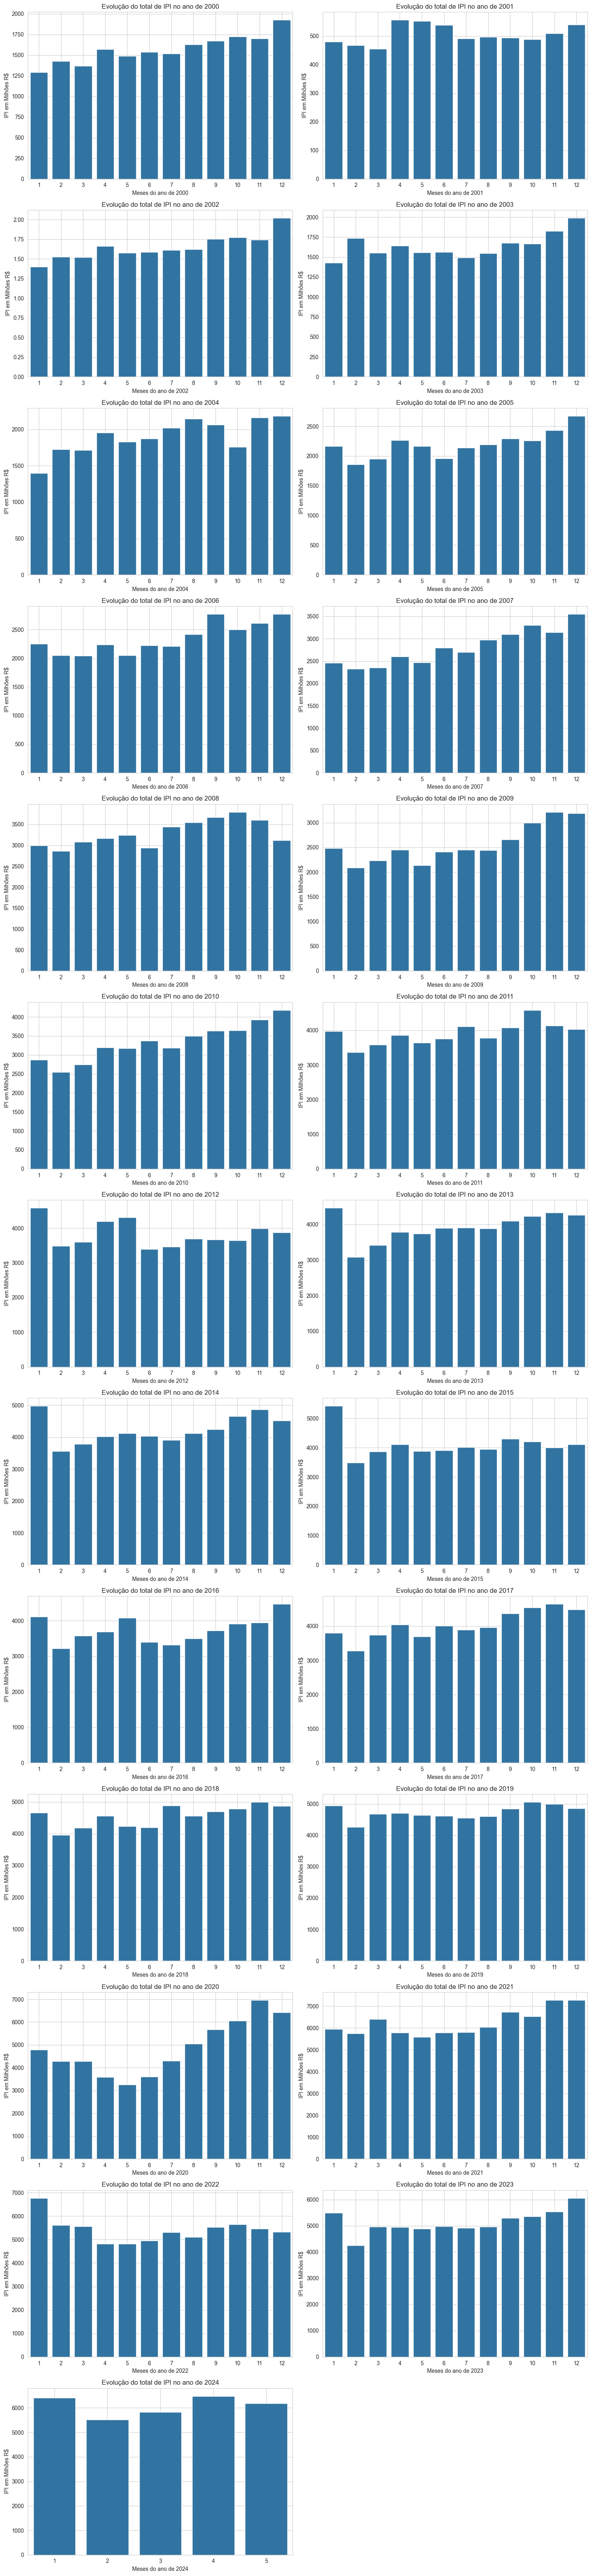

In [105]:
# Definir o número de colunas por linha
num_cols = 2
num_rows = -(-len(ano_index) // num_cols)  # Calcular o número de linhas necessário (arredondando para cima)

# Criar a figura e os subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Ajustar o tamanho da figura
axes = axes.flatten()  # Achatar os eixos para facilitar a iteração

# Gerar os gráficos
for idx, i in enumerate(ano_index):
    ano_filtrado = ipi_ano_mes[ipi_ano_mes['ano'] == i]
    sns.barplot(data=ano_filtrado, x='mes', y='ipi_total_mi', errorbar=None, ax=axes[idx])
    axes[idx].set_title(f'Evolução do total de IPI no ano de {i}')
    axes[idx].set_xlabel(f'Meses do ano de {i}')
    axes[idx].set_ylabel('IPI em Milhões R$')
    axes[idx].grid(True)

# Remover subplots vazios, se houver
for j in range(len(ano_index), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Insights Gerais:

1. **Tendência de longo prazo crescente**: Desde 2000 até 2024, observa-se uma tendência geral de crescimento na arrecadação do IPI, com algumas oscilações importantes.
    
2. **Anomalia em 2002**: Os dados de 2002 apresentam valores extremamente baixos (na ordem de milhares) em comparação com os outros anos (na ordem de bilhões/milhões), sugerindo um possível erro de registro ou mudança na escala de medição.
    
3. **Impacto da pandemia**: Houve uma queda acentuada na arrecadação durante os primeiros meses da pandemia (abril-junho de 2020), seguida de uma forte recuperação no final de 2020 e em 2021.
    
4. **Recorde em 2021**: O ano de 2021 apresentou valores recordes de arrecadação, especialmente nos últimos meses do ano, refletindo a recuperação econômica pós-pandemia.
    
5. **Estabilização recente**: Em 2022-2023, houve uma estabilização com leve queda em relação ao pico de 2021, mas ainda em patamares elevados historicamente.
    
6. **Recuperação em 2024**: Os primeiros meses de 2024 mostram uma tendência de crescimento em relação a 2023.
    

### Padrões Sazonais:

1. **Efeito dezembro**: Dezembro geralmente apresenta valores mais altos que a média anual, possivelmente relacionado ao aumento de consumo no final do ano.
    
2. **Ciclo janeiro-fevereiro**: Janeiro frequentemente apresenta valores elevados, enquanto fevereiro costuma mostrar uma queda significativa.
    
3. **Crescimento no segundo semestre**: Há uma tendência de crescimento progressivo dos valores durante o segundo semestre do ano.
    
4. **Meses com melhor desempenho**: Novembro e dezembro consistentemente apresentam os maiores valores de arrecadação ao longo dos anos.
    

### Eventos Econômicos Significativos:

1. **Crise de 2008-2009**: É possível observar uma queda na arrecadação média em 2009 em relação a 2008, refletindo a crise econômica global.
    
2. **Crescimento 2010-2013**: Forte período de crescimento após a recuperação da crise global.
    
3. **Recessão 2015-2016**: Queda nos valores durante a recessão econômica brasileira deste período.
    
4. **Choque da pandemia (2020)**: Queda brusca seguida de recuperação rápida e acima dos níveis pré-pandemia.
    
5. **Ajuste pós-pandemia (2022)**: Normalização após o pico de 2021, mas ainda em patamares elevados.
    

### **Concentração Regional**

Qual Unidade Federativa apresenta a maior arrecadação média de COFINS (Contribuição para o Financiamento da Seguridade Social) e como essa arrecadação se distribui entre as diferentes regiões do país?

In [106]:
uf_cofins = df.groupby('sigla_uf')['cofins'].sum().reset_index()
uf_cofins['cofins_mi'] = uf_cofins['cofins'] / 1000000
uf_cofins = uf_cofins.sort_values(by='cofins_mi', ascending=False)
uf_cofins

,sigla_uf,cofins,cofins_mi
25,SP,3.895471e+10,38954.711642
18,RJ,1.670815e+10,16708.148795
10,MG,9.241534e+09,9241.534498
6,DF,6.293112e+09,6293.112378
17,PR,6.062380e+09,6062.379514
22,RS,5.604193e+09,5604.192691
4,BA,3.287371e+09,3287.371101
23,SC,2.761802e+09,2761.802195
2,AM,2.556689e+09,2556.689398
15,PE,1.981310e+09,1981.309518


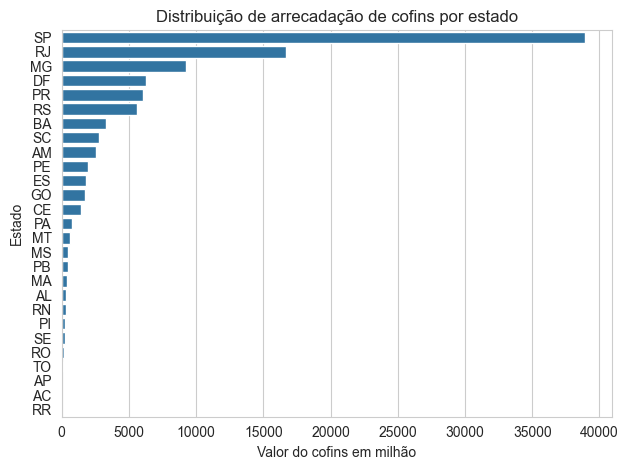

In [107]:
plt.Figure(figsize=(20, 15))
sns.barplot(data=uf_cofins, y='sigla_uf', x='cofins_mi')
plt.title('Distribuição de arrecadação de cofins por estado')
plt.xlabel('Valor do cofins em milhão')
plt.ylabel('Estado')
plt.tight_layout()

## Concentração Extrema na Arrecadação

1. **Dominância de poucos estados**: São Paulo sozinho responde por aproximadamente 38% de toda a arrecadação nacional, com 38,9 bilhões de reais.
2. **Concentração nos maiores estados**:
    - Os 3 maiores arrecadadores (SP, RJ e MG) concentram 63,1% do total
    - Os 5 maiores (acrescentando DF e PR) chegam a 75,2% da arrecadação total
3. **Disparidade significativa**: A diferença entre o maior e o menor arrecadador é monumental - São Paulo arrecada 1.125 vezes mais que Roraima.

## Distribuição Regional Desequilibrada

1. **Predomínio do Sudeste**: A região sozinha concentra 64,9% da arrecadação total nacional.
2. **Contribuição das demais regiões**:
    - Sul: 14,0%
    - Centro-Oeste: 8,9%
    - Nordeste: 8,5%
    - Norte: 3,7%
3. **Casos atípicos regionais**:
    - O Distrito Federal destaca-se em 4º lugar nacional, muito acima da maioria dos estados
    - O Amazonas aparece em 9º lugar, destoando dos demais estados do Norte, provavelmente devido à Zona Franca de Manaus

## Evidências Estatísticas de Concentração

1. **Distorção entre média e mediana**:
    - Média de arrecadação: 3,8 bilhões por estado
    - Mediana: apenas 809,5 milhões
    - Esta diferença indica uma distribuição fortemente assimétrica
2. **Desigualdade regional**:
    - Sul apresenta consistência, com seus três estados (PR, RS e SC) entre os 8 maiores arrecadadores
    - Nordeste contribui com apenas 8,5% apesar de conter 9 dos 27 estados brasileiros
    - Norte apresenta os menores valores, com 6 estados entre os 7 com menor arrecadação

## Conclusões Econômicas

Esta distribuição reflete claramente a concentração da atividade econômica formal no Brasil, especialmente nas regiões Sudeste e Sul. A alta arrecadação no DF provavelmente se relaciona à concentração de sedes de empresas estatais e órgãos governamentais.

## Análise Bivariada

### **Correlação entre Impostos**

 Qual é o coeficiente de correlação entre o imposto de importação e o IPI sobre importações? Construa um gráfico de dispersão e analise se existe uma relação linear entre essas variáveis.

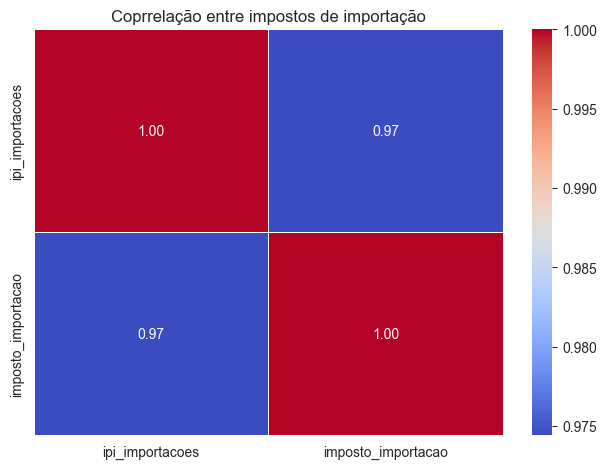

In [108]:
df_corr1 = df[['ipi_importacoes', 'imposto_importacao']]
df_corr1 = df_corr1.corr()
plt.Figure(figsize=(10, 8))
sns.heatmap(data=df_corr1, linewidths=.5, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Coprrelação entre impostos de importação')
plt.tight_layout()

Esta correlação extremamente forte (0,97) entre "ipi_importacoes" e "imposto_importacao" revela vários aspectos importantes:

### Implicações Econômicas e Fiscais

1. **Comportamento quase idêntico**: Os dois impostos seguem praticamente os mesmos padrões de arrecadação, sugerindo que ambos respondem de forma muito semelhante às variações na atividade de importação.
    
2. **Redundância potencial**: Uma correlação tão alta pode indicar uma sobreposição significativa na base tributária, levantando questões sobre a necessidade de manter dois instrumentos fiscais tão similares.
    
3. **Previsibilidade orçamentária**: Para fins de previsão orçamentária governamental, conhecer a arrecadação de um desses impostos permite prever com alta precisão o comportamento do outro.
    

### Perspectivas para Política Tributária

1. **Simplificação fiscal**: A forte correlação pode embasar argumentos para uma possível consolidação destes impostos, reduzindo a complexidade do sistema tributário brasileiro relacionado ao comércio exterior.
    
2. **Impactos de políticas**: Qualquer mudança na alíquota ou base de cálculo de um desses impostos provavelmente terá efeitos semelhantes no volume arrecadado pelo outro.
    
3. **Vulnerabilidade combinada**: Esta alta correlação sugere que ambos os impostos são igualmente vulneráveis às mesmas condições de mercado, crises econômicas ou mudanças no padrão de comércio internacional.
    

### Considerações Metodológicas

1. **Diferenciação visual**: A representação gráfica usando cores distintas (vermelho vs. azul) para valores muito próximos (1,00 vs. 0,97) pode exagerar pequenas diferenças que têm pouca relevância prática.
    
2. **Correlação ≠ Causalidade**: Apesar da alta correlação, é importante lembrar que isso não estabelece uma relação causal entre os impostos, mas provavelmente indica que ambos respondem aos mesmos fatores subjacentes (volume de importações).

### **Comparação Temporal**

Como se comporta a relação entre IRPJ para entidades financeiras e IRPJ para demais empresas ao longo do tempo? Houve alguma mudança significativa nessa relação em determinados períodos?

In [109]:
cols_irpj = ['irpj_demais_empresas', 'irpj_entidades_financeiras', 'ano']
df_fil = df[cols_irpj]
df_fil['irpj_demais_empresas_mi'] = df_fil['irpj_demais_empresas'] / 1000000
df_fil['irpj_entidades_financeiras_mi'] = df_fil['irpj_entidades_financeiras'] / 1000000

C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_8852\3985105921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil['irpj_demais_empresas_mi'] = df_fil['irpj_demais_empresas'] / 1000000
C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_8852\3985105921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil['irpj_entidades_financeiras_mi'] = df_fil['irpj_entidades_financeiras'] / 1000000


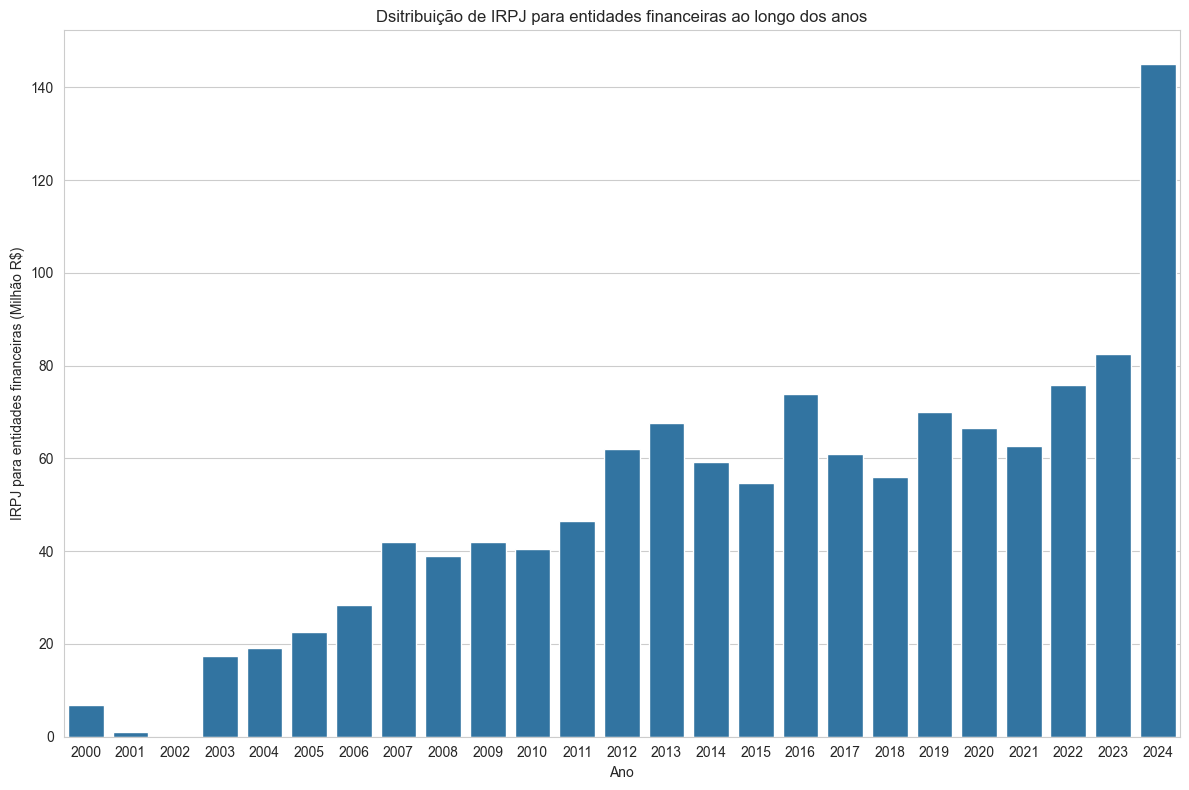

In [110]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_fil, x='ano', y='irpj_entidades_financeiras_mi', errorbar=None)
plt.title('Dsitribuição de IRPJ para entidades financeiras ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('IRPJ para entidades financeiras (Milhão R$)')
plt.tight_layout()
plt.show()

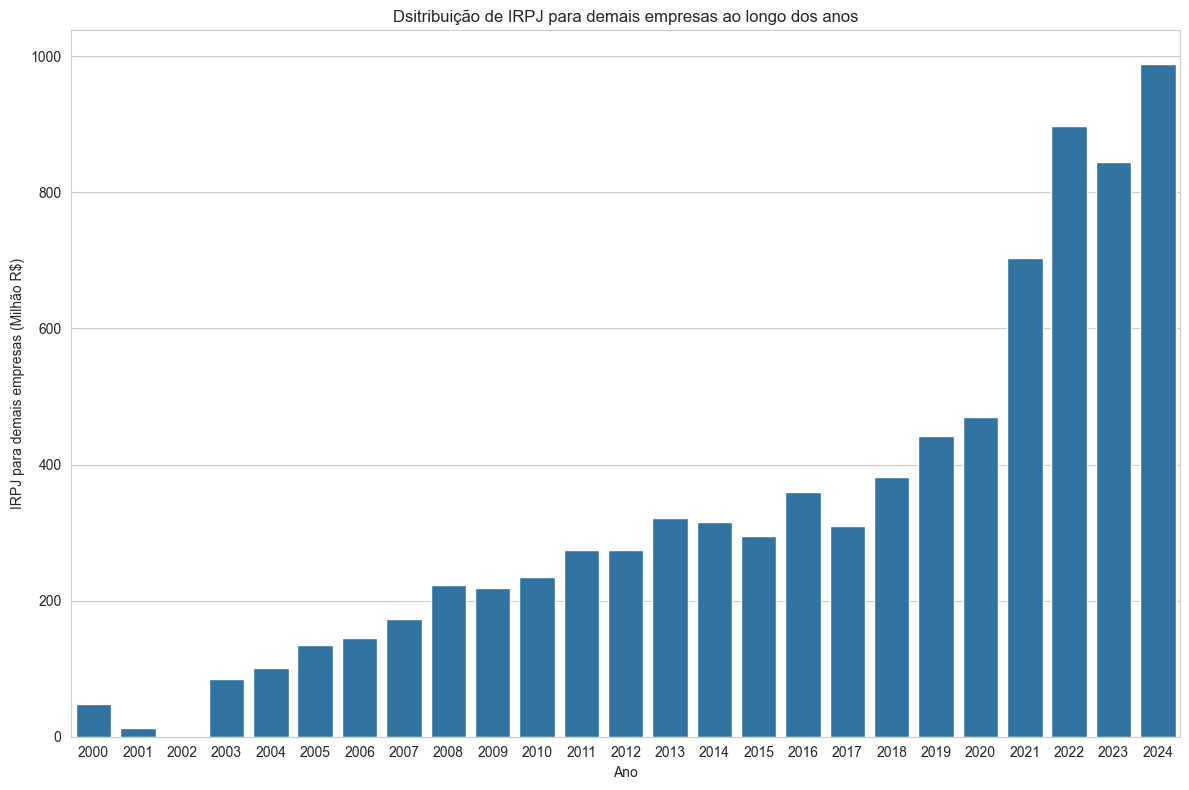

In [111]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_fil, x='ano', y='irpj_demais_empresas_mi', errorbar=None)
plt.title('Dsitribuição de IRPJ para demais empresas ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('IRPJ para demais empresas (Milhão R$)')
plt.tight_layout()
plt.show()

Analisando os dois gráficos apresentados sobre a distribuição do Imposto de Renda de Pessoa Jurídica (IRPJ) ao longo dos anos, observam-se padrões significativamente diferentes entre entidades financeiras e demais empresas.

## Principais Insights

### 1. Diferença de Escala e Magnitude

- **Entidades Financeiras**: A arrecadação varia entre aproximadamente 7 bilhões (2000) e 145 bilhões de reais (2024)
- **Demais Empresas**: A escala é muito maior, chegando a quase 1 trilhão de reais em 2024, partindo de cerca de 40 bilhões em 2000

### 2. Padrões de Crescimento

- **Entidades Financeiras**:
    
    - Crescimento moderado e gradual entre 2000-2011
    - Estabilização relativa entre 2011-2020 (oscilando entre 55-75 bilhões)
    - Crescimento mais acelerado a partir de 2021, com salto extraordinário em 2024
- **Demais Empresas**:
    
    - Crescimento mais consistente e proporcional até 2019
    - Aceleração dramática a partir de 2020
    - Aumento exponencial entre 2020-2024

### 3. Impactos de Eventos Econômicos

- **2008-2009 (Crise Financeira Global)**:
    
    - Impacto limitado nas entidades financeiras (leve estabilização)
    - Desaceleração visível, mas discreta, para demais empresas
- **2020 (Pandemia COVID-19)**:
    
    - Curiosamente, marca o início de forte aceleração na arrecadação para ambos os grupos
    - Ao contrário do esperado em uma crise, observa-se aumento significativo na arrecadação

### 4. Proporção Relativa

- Em 2000, a arrecadação das entidades financeiras representava proporção significativa do total
- Em 2024, apesar do crescimento absoluto, as entidades financeiras representam uma parcela muito menor da arrecadação total de IRPJ

## Análise Conjuntural

1. **Transformação do Perfil Econômico**: O crescimento extraordinariamente mais acelerado das demais empresas sugere uma diversificação da economia brasileira, com diminuição da predominância relativa do setor financeiro como contribuinte de IRPJ.
    
2. **Período Pós-Pandemia (2021-2024)**: Observa-se crescimento sem precedentes em ambos os setores, possivelmente refletindo:
    
    - Recuperação econômica acelerada
    - Possíveis mudanças na legislação tributária
    - Inflação elevada aumentando valores nominais
    - Maior formalização ou fiscalização de negócios
3. **Peculiaridade de 2024**: Em ambos os gráficos, 2024 apresenta um salto excepcional, sugerindo algum evento específico:
    
    - Possível alteração na política fiscal ou tributária
    - Movimento extraordinário de lucros corporativos
    - Potencial efeito de repatriação de recursos ou regularização fiscal

### **Impacto Econômico**

Existe correlação entre o IOF (Imposto sobre Operações Financeiras) e as remessas ao exterior (IRRF remessas exterior)? Como essa relação pode indicar movimentos na economia?

In [113]:
df_corr2 = df[['irrf_rendimentos_trabalho',
       'irrf_rendimentos_capital', 'irrf_remessas_exterior',
       'irrf_outros_rendimentos', 'iof']]

In [114]:
df_corr2 = df_corr2.corr()

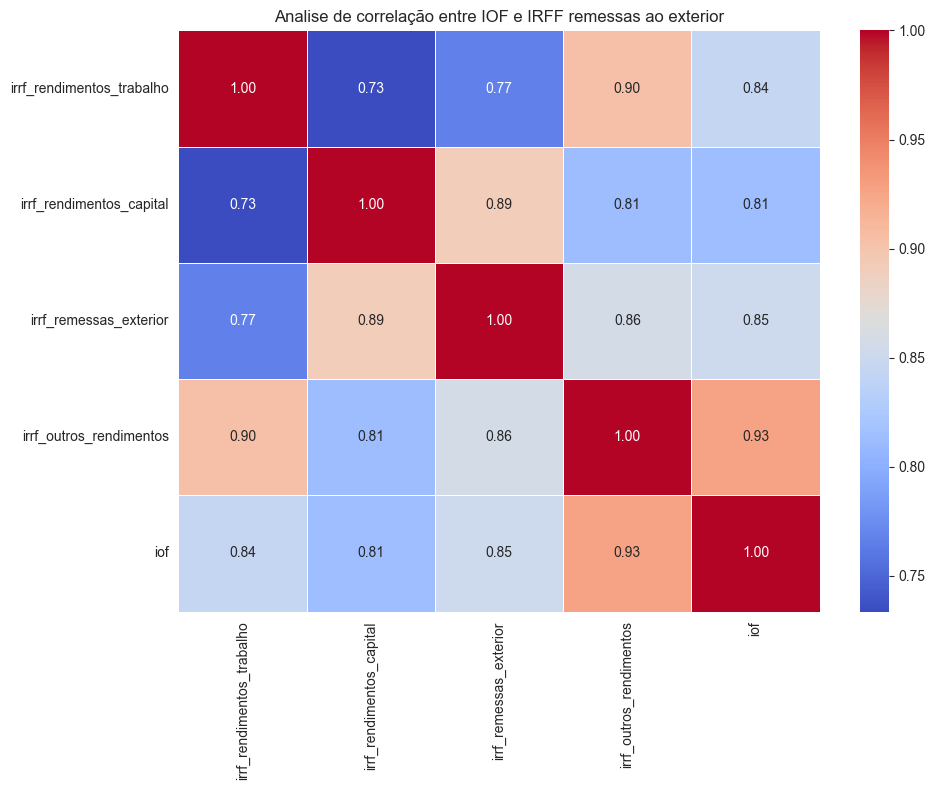

In [115]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_corr2, annot=True, linewidths=.5, cmap='coolwarm', fmt='.2f')
plt.title('Analise de correlação entre IOF e IRFF remessas ao exterior')
plt.tight_layout()

A correlação ligeiramente negativa entre o IOF (Imposto sobre Operações Financeiras) e o IRRF (Imposto de Renda Retido na Fonte) sobre remessas ao exterior pode ocorrer devido a fatores econômicos e comportamentais relacionados à natureza dessas operações.

1. **Substituição de Operações Financeiras**:
   - Quando há um aumento no IOF, o custo das operações financeiras (como empréstimos, câmbio ou investimentos) aumenta. Isso pode desestimular transações financeiras que envolvem remessas ao exterior, reduzindo a base tributável do IRRF sobre essas remessas.

2. **Política Econômica e Tributária**:
   - O governo pode ajustar as alíquotas de IOF e IRRF de forma independente, dependendo de objetivos econômicos específicos. Por exemplo, um aumento no IOF pode ser usado para desestimular operações financeiras de curto prazo, enquanto o IRRF sobre remessas ao exterior pode ser ajustado para incentivar ou desincentivar fluxos de capital.

3. **Impacto no Fluxo de Capital**:
   - Um aumento no IOF pode reduzir o volume de operações financeiras internacionais, como remessas ao exterior, o que impacta diretamente a arrecadação do IRRF sobre essas remessas.

4. **Condições Econômicas Globais**:
   - Em períodos de instabilidade econômica, pode haver uma redução nas remessas ao exterior devido à menor atividade econômica, o que impacta tanto o IOF quanto o IRRF. No entanto, a relação entre os dois pode ser inversa dependendo de como cada imposto é aplicado.

5. **Comportamento dos Contribuintes**:
   - Um aumento no IOF pode levar empresas e indivíduos a buscar alternativas para evitar operações financeiras que gerem esse imposto, o que pode impactar indiretamente o volume de remessas ao exterior e, consequentemente, o IRRF.

A correlação negativa, portanto, reflete uma interação complexa entre políticas tributárias, comportamento econômico e condições de mercado. Para entender melhor, seria necessário analisar os dados em mais detalhes, incluindo as alíquotas aplicadas, volumes de transações e o contexto econômico de cada período.

## Análise Multivariada

### **Perfil de Arrecadação por Estado**

Utilizando técnicas de clustering (como K-means), é possível identificar grupos de estados com perfis similares de arrecadação considerando simultaneamente IRPF, COFINS e PIS/PASEP? Que características definem cada cluster?

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [117]:
df_fill_kmean = df[['sigla_uf', 'irrf_rendimentos_trabalho',
       'irrf_rendimentos_capital', 'irrf_remessas_exterior',
       'irrf_outros_rendimentos', 'cofins',
       'cofins_entidades_financeiras', 'cofins_demais_empresas', 'pis_pasep',
       'pis_pasep_entidades_financeiras', 'pis_pasep_demais_empresas']]

In [124]:
df_fill_kmean = df_fill_kmean.fillna(0)

In [125]:
df_estado = df_fill_kmean['sigla_uf']
X = df_fill_kmean.drop('sigla_uf', axis=1)

In [126]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled_df = pd.DataFrame(x_scaled, columns=X.columns)

In [127]:
# 3. Determinar o número ótimo de clusters
# Método do cotovelo
inertia = []
silhouette_scores = []
k_range = range(2, 10)  # Testando de 2 a 9 clusters

In [128]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(x_scaled, labels))

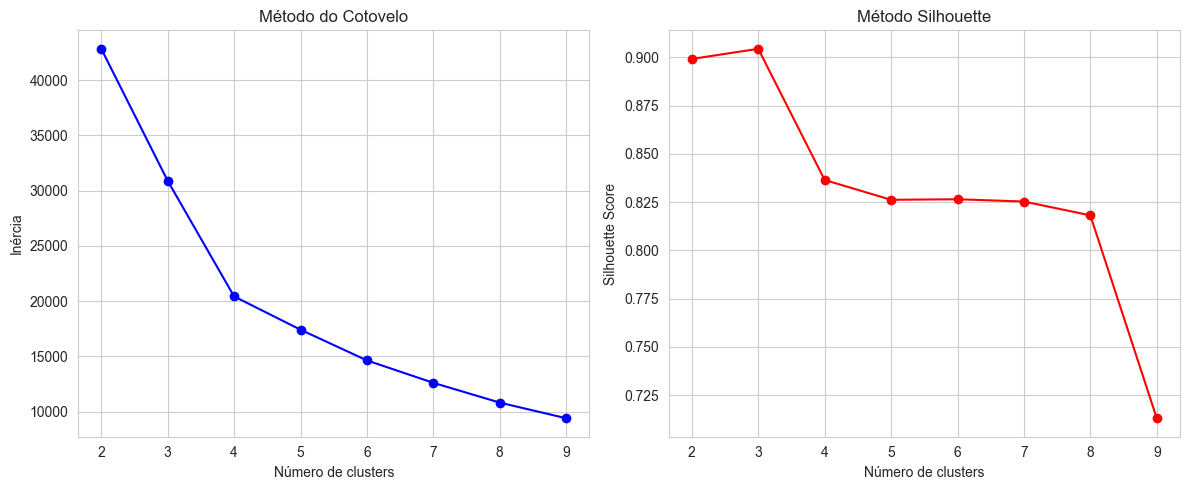

In [129]:
# Plotar o gráfico do cotovelo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Método Silhouette')
plt.grid(True)

plt.tight_layout()

In [133]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(x_scaled)

In [134]:
df_fill_kmean['Cluster'] = clusters

In [136]:
df_fill_kmean.Cluster.value_counts()

Cluster
0    7702
1     179
2      30
Name: count, dtype: int64

In [139]:
# Estatísticas descritivas por cluster
for i in range(3):
    print(f"\n=== Cluster {i} ===")
    cluster_states = df_fill_kmean[df_fill_kmean['Cluster'] == i]['sigla_uf'].tolist()
    print(f"Estados: {', '.join(cluster_states)}")
    print(f"Número de estados: {len(cluster_states)}")
    print("\nEstatísticas descritivas:")
    print(df_fill_kmean[df_fill_kmean['Cluster'] == i].drop(['sigla_uf', 'Cluster'], axis=1).describe().round(2))


=== Cluster 0 ===
Estados: AC, AC, AC, AC, AC, AC, AC, AC, AC, AC, AC, AC, AL, AL, AL, AL, AL, AL, AL, AL, AL, AL, AL, AL, AM, AM, AM, AM, AM, AM, AM, AM, AM, AM, AM, AM, AP, AP, AP, AP, AP, AP, AP, AP, AP, AP, AP, AP, BA, BA, BA, BA, BA, BA, BA, BA, BA, BA, BA, BA, CE, CE, CE, CE, CE, CE, CE, CE, CE, CE, CE, CE, DF, DF, DF, DF, DF, DF, DF, DF, DF, DF, DF, DF, ES, ES, ES, ES, ES, ES, ES, ES, ES, ES, ES, ES, GO, GO, GO, GO, GO, GO, GO, GO, GO, GO, GO, GO, MA, MA, MA, MA, MA, MA, MA, MA, MA, MA, MA, MA, MG, MG, MG, MG, MG, MG, MG, MG, MG, MG, MG, MG, MS, MS, MS, MS, MS, MS, MS, MS, MS, MS, MS, MS, MT, MT, MT, MT, MT, MT, MT, MT, MT, MT, MT, MT, PA, PA, PA, PA, PA, PA, PA, PA, PA, PA, PA, PA, PB, PB, PB, PB, PB, PB, PB, PB, PB, PB, PB, PB, PE, PE, PE, PE, PE, PE, PE, PE, PE, PE, PE, PE, PI, PI, PI, PI, PI, PI, PI, PI, PI, PI, PI, PI, PR, PR, PR, PR, PR, PR, PR, PR, PR, PR, PR, PR, RJ, RJ, RJ, RJ, RJ, RJ, RJ, RJ, RJ, RJ, RJ, RJ, RN, RN, RN, RN, RN, RN, RN, RN, RN, RN, RN, RN, RO, RO, RO, 

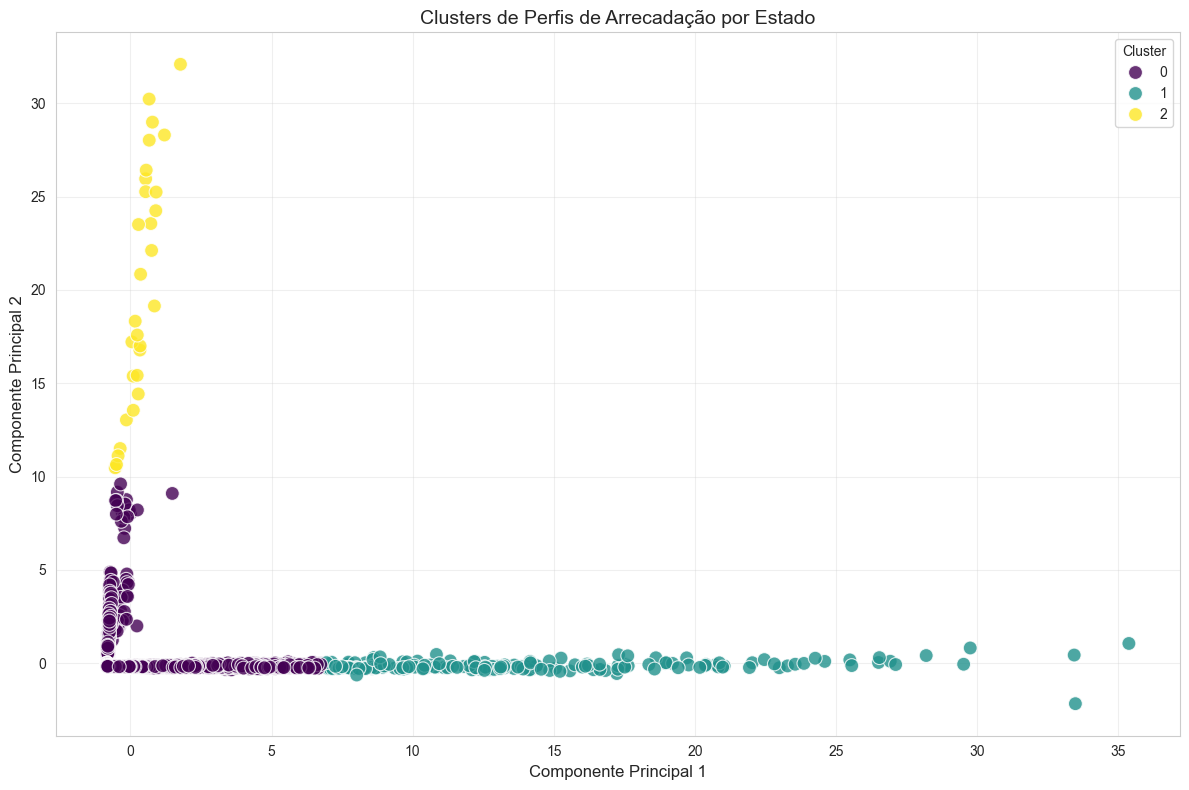

In [148]:
# PCA para reduzir a dimensionalidade e visualizar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

# Criar um DataFrame com os resultados do PCA e os clusters
pca_df = pd.DataFrame(
    data=X_pca, 
    columns=['Componente_1', 'Componente_2']
)
pca_df['Cluster'] = clusters
pca_df['Estado'] = df_fill_kmean['sigla_uf']

# Visualizar os clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Componente_1', y='Componente_2',
    hue='Cluster',
    palette='viridis',
    data=pca_df,
    s=100,
    alpha=0.8
)
# Configurações do gráfico
plt.title('Clusters de Perfis de Arrecadação por Estado', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

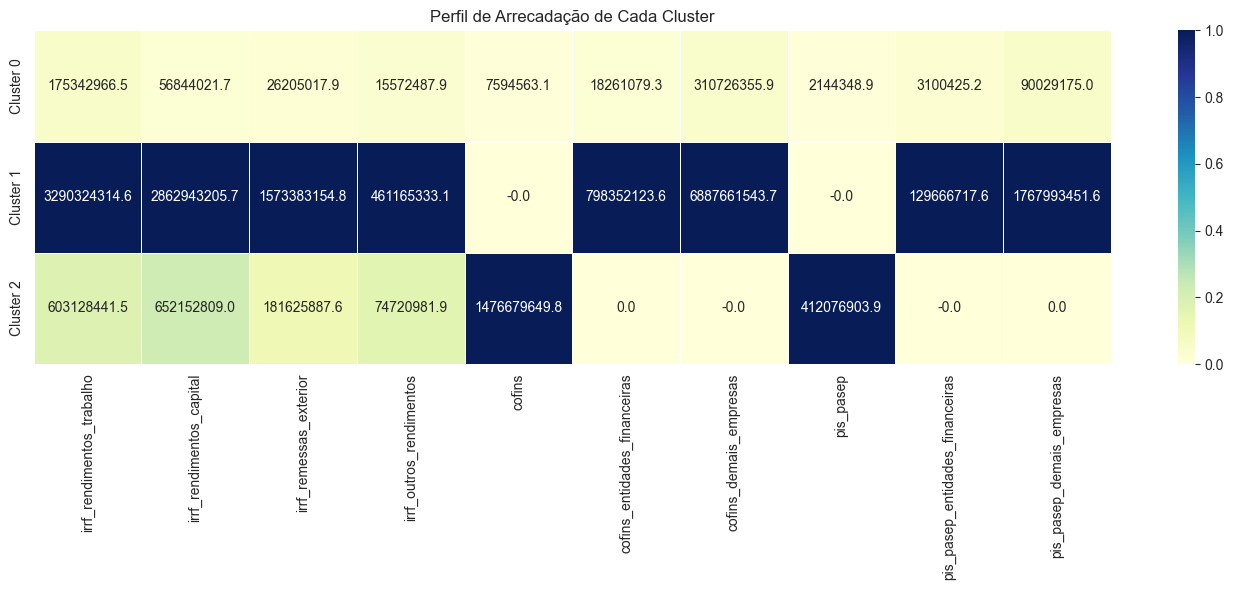

In [154]:
# Criar um heatmap com os centróides dos clusters
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(
    scaler.inverse_transform(centroids),
    columns=X.columns
)
centroids_df.index = [f'Cluster {i}' for i in range(3)]

# Normalizar os centróides para visualização comparativa
centroids_normalized = centroids_df.copy()
for col in centroids_normalized.columns:
    max_val = centroids_normalized[col].max()
    centroids_normalized[col] = centroids_normalized[col] / max_val

plt.figure(figsize=(14, 6))
sns.heatmap(
    centroids_normalized,
    annot=centroids_df.round(1),
    cmap='YlGnBu',
    fmt='.1f',
    linewidths=.5
)
plt.title('Perfil de Arrecadação de Cada Cluster')
plt.tight_layout()
plt.show()

In [153]:
# Encontrar o imposto dominante em cada cluster
dominant_taxes = {}
for i in range(3):
    cluster_centroid = centroids_df.iloc[i]
    dominant_tax = cluster_centroid.idxmax()
    dominant_taxes[f'Cluster {i}'] = {
        'Imposto dominante': dominant_tax,
        'Valor médio': cluster_centroid[dominant_tax],
        'Estados': df_fill_kmean[df_fill_kmean['Cluster'] == i]['sigla_uf'].tolist()
    }

print("\n=== Perfis dos Clusters ===")
for cluster, info in dominant_taxes.items():
    print(f"\n{cluster}:")
    print(f"Imposto dominante: {info['Imposto dominante']}")
    print(f"Valor médio: {info['Valor médio']:.2f}")
    print(f"Estados: {', '.join(info['Estados'])}")



=== Perfis dos Clusters ===

Cluster 0:
Imposto dominante: cofins_demais_empresas
Valor médio: 310726355.88
Estados: AC, AC, AC, AC, AC, AC, AC, AC, AC, AC, AC, AC, AL, AL, AL, AL, AL, AL, AL, AL, AL, AL, AL, AL, AM, AM, AM, AM, AM, AM, AM, AM, AM, AM, AM, AM, AP, AP, AP, AP, AP, AP, AP, AP, AP, AP, AP, AP, BA, BA, BA, BA, BA, BA, BA, BA, BA, BA, BA, BA, CE, CE, CE, CE, CE, CE, CE, CE, CE, CE, CE, CE, DF, DF, DF, DF, DF, DF, DF, DF, DF, DF, DF, DF, ES, ES, ES, ES, ES, ES, ES, ES, ES, ES, ES, ES, GO, GO, GO, GO, GO, GO, GO, GO, GO, GO, GO, GO, MA, MA, MA, MA, MA, MA, MA, MA, MA, MA, MA, MA, MG, MG, MG, MG, MG, MG, MG, MG, MG, MG, MG, MG, MS, MS, MS, MS, MS, MS, MS, MS, MS, MS, MS, MS, MT, MT, MT, MT, MT, MT, MT, MT, MT, MT, MT, MT, PA, PA, PA, PA, PA, PA, PA, PA, PA, PA, PA, PA, PB, PB, PB, PB, PB, PB, PB, PB, PB, PB, PB, PB, PE, PE, PE, PE, PE, PE, PE, PE, PE, PE, PE, PE, PI, PI, PI, PI, PI, PI, PI, PI, PI, PI, PI, PI, PR, PR, PR, PR, PR, PR, PR, PR, PR, PR, PR, PR, RJ, RJ, RJ, RJ, RJ

### **Componentes Principais da Arrecadação**

Aplique a Análise de Componentes Principais (PCA) nas diferentes categorias de impostos. Quais variáveis fiscais explicam a maior parte da variância nos dados de arrecadação e como elas se relacionam entre si?

In [156]:
# Guardar os nomes dos estados para referência posterior
estados_nomes = df['sigla_uf']

# Selecionar apenas as colunas numéricas para PCA
X = df.drop('sigla_uf', axis=1)

In [158]:
X = X.fillna(0)

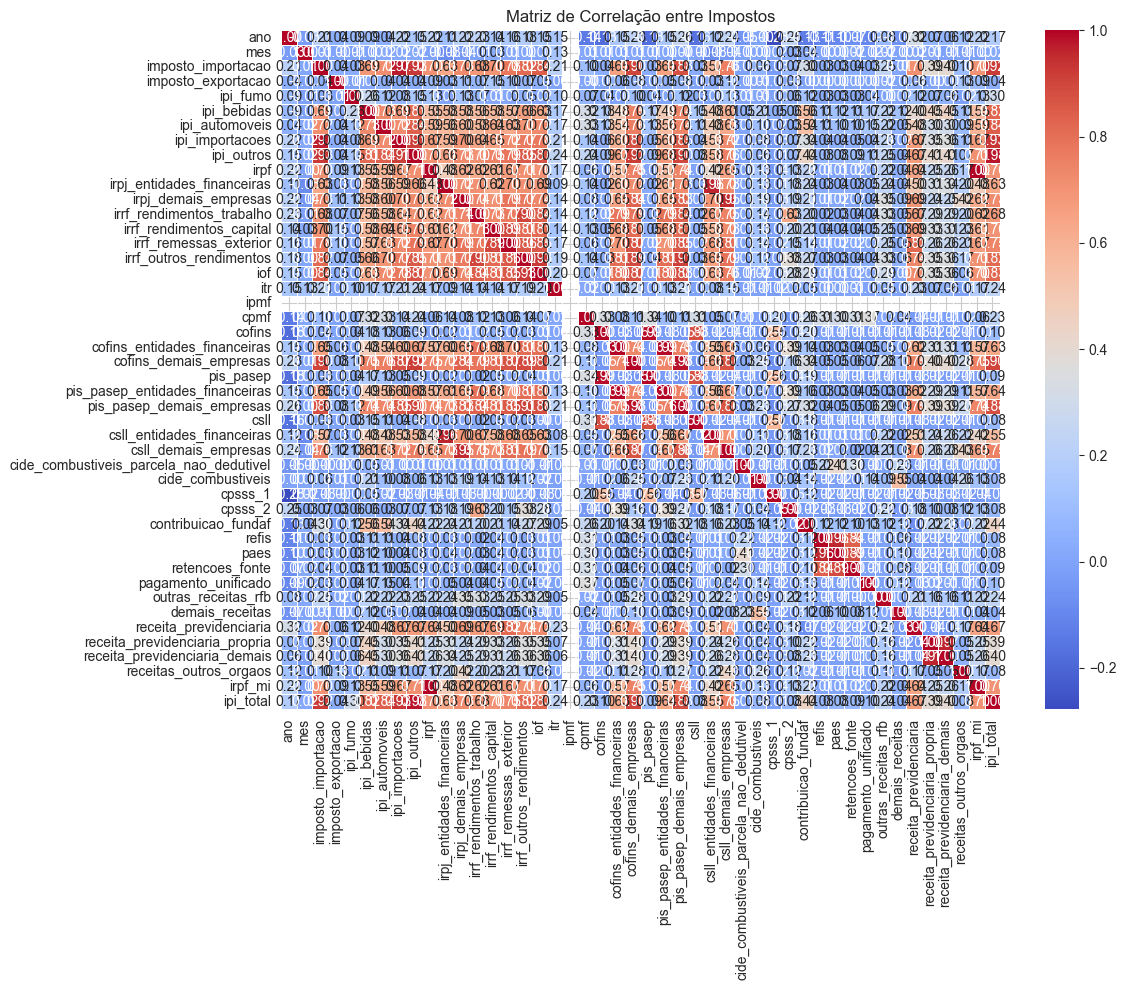

In [159]:
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Impostos')
plt.tight_layout()

In [160]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA
n_components = len(X.columns)  # Usar todos os componentes inicialmente
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Calcular a porcentagem de variância explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Criar dataframe para visualização
variance_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(n_components)],
    'Variância Explicada (%)': explained_variance_ratio * 100,
    'Variância Acumulada (%)': cumulative_variance_ratio * 100
})

print("Variância explicada por componente:")
variance_df

Variância explicada por componente:


,Componente,Variância Explicada (%),Variância Acumulada (%)
0,PC1,3.745532e+01,37.455323
1,PC2,8.463040e+00,45.918363
2,PC3,6.851014e+00,52.769377
3,PC4,4.825500e+00,57.594877
4,PC5,3.997349e+00,61.592226
5,PC6,3.803802e+00,65.396029
6,PC7,3.070185e+00,68.466214
7,PC8,2.940345e+00,71.406559
8,PC9,2.736269e+00,74.142828
9,PC10,2.432095e+00,76.574923


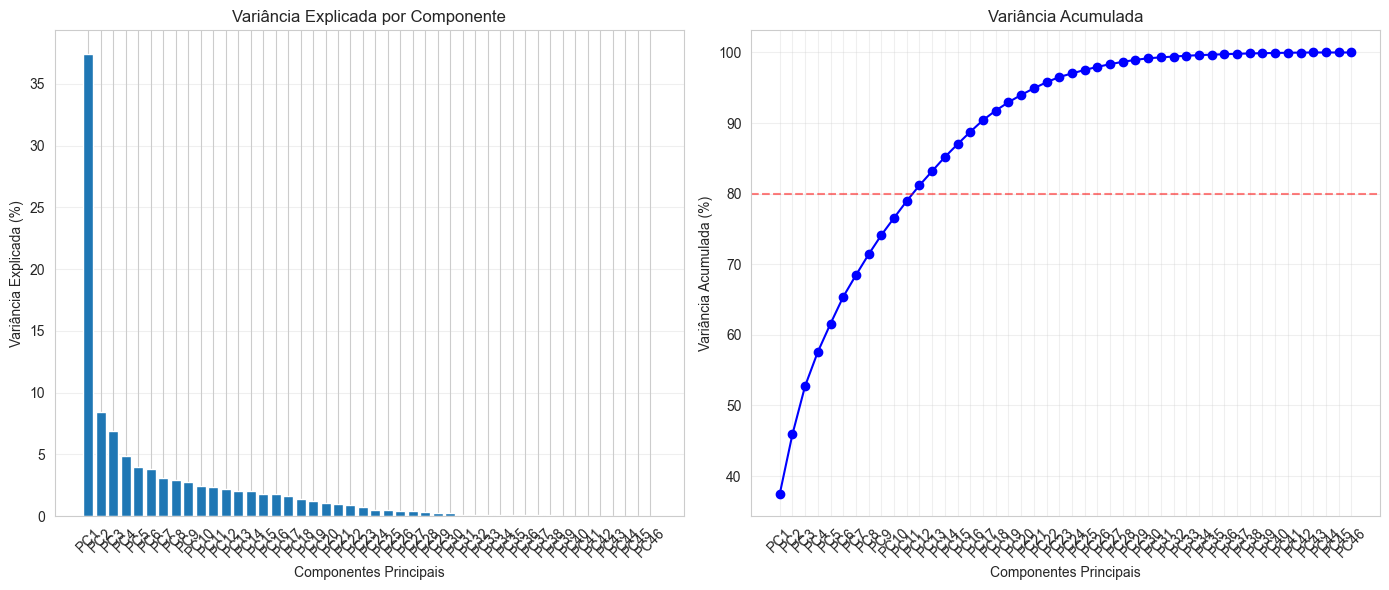

In [163]:
# Plotar gráfico de variância explicada
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(variance_df['Componente'], variance_df['Variância Explicada (%)'])
plt.title('Variância Explicada por Componente')
plt.xlabel('Componentes Principais')
plt.ylabel('Variância Explicada (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(variance_df['Componente'], variance_df['Variância Acumulada (%)'], 'bo-')
plt.axhline(y=80, color='r', linestyle='--', alpha=0.5)  # Linha de referência em 80%
plt.title('Variância Acumulada')
plt.xlabel('Componentes Principais')
plt.ylabel('Variância Acumulada (%)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout()

In [166]:
# Criar dataframe com os pesos de cada variável nos componentes principais
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=X.columns
)

print("\nLoadings (pesos) de cada variável nos componentes principais:")
loadings.head()


Loadings (pesos) de cada variável nos componentes principais:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
ano,0.054104,-0.192062,-0.024910,-0.062680,-0.081796,-0.061321,-0.327363,0.213306,-0.197106,-0.156327,-0.110364,0.087585,-0.329459,0.201753,-0.148076,0.414257,-0.297365,0.111414,0.342522,0.028864,0.255722,-0.218085,0.110048,0.073596,-0.006077,-0.037577,-0.035116,-0.032543,-0.023995,-0.086792,0.065319,0.019313,-0.012381,0.004147,-0.006213,-0.010692,0.004962,0.006529,-0.005468,0.008310,-0.010665,-0.004439,-0.002720,0.000000e+00,-0.000000e+00,-0.000000e+00
mes,-0.000196,0.013699,0.003308,0.017226,-0.056871,-0.077472,-0.073204,0.272098,0.180494,0.586351,0.299444,0.299579,0.205778,-0.217959,0.241086,0.111007,-0.383155,0.199662,0.046020,-0.020390,-0.048710,-0.025056,0.016837,0.001395,0.001826,0.026020,-0.016852,0.007246,-0.016587,-0.023254,-0.004477,-0.002199,-0.002746,0.016715,-0.010113,-0.000974,-0.004480,-0.001821,-0.000645,0.001646,0.000805,-0.002778,0.001350,2.528580e-16,1.474413e-16,-5.171970e-16
imposto_importacao,0.220039,0.008933,-0.009727,0.072530,-0.092481,-0.131505,-0.016056,-0.084463,0.089265,-0.004387,0.040682,-0.032449,-0.098543,0.042014,-0.023394,0.067948,-0.077930,-0.146655,0.107899,-0.039168,-0.278167,0.154021,-0.054862,-0.068586,-0.062615,-0.182700,-0.032508,-0.006935,0.098070,-0.027877,0.021792,0.017276,-0.074210,0.246922,0.020484,0.178321,-0.254695,-0.131788,0.004159,0.644428,-0.133730,-0.267039,0.031615,-7.205093e-15,3.715395e-15,3.441825e-14
imposto_exportacao,0.019753,-0.018055,-0.005238,-0.082176,0.064964,0.013325,-0.151903,-0.100186,-0.127612,0.484813,-0.407720,-0.314686,0.381320,0.348484,-0.350435,-0.065915,-0.146168,0.021374,0.052787,-0.027873,-0.085087,0.069488,0.049264,0.005085,0.027344,0.001603,0.001959,0.000836,-0.052281,0.014243,-0.003115,0.023429,-0.005704,-0.004243,0.008948,-0.005347,-0.004857,-0.007086,0.000301,-0.003743,0.001396,-0.001516,0.000259,-1.755924e-16,1.749057e-16,-4.278749e-16
ipi_fumo,0.028478,0.049495,0.021474,0.105905,0.010816,-0.188111,-0.242396,0.302846,-0.303983,-0.352574,-0.220368,0.162335,0.443906,-0.142433,0.161582,-0.364498,-0.152493,-0.056925,-0.081682,-0.009797,0.046256,-0.020922,0.052450,0.057714,-0.067263,-0.200061,-0.017650,-0.001950,-0.010934,-0.095913,0.048086,-0.010050,0.011884,0.069657,-0.002395,0.049128,-0.057929,-0.023943,0.001586,0.036709,-0.007804,-0.005053,0.005311,-7.193237e-02,1.009799e-02,-1.206308e-01


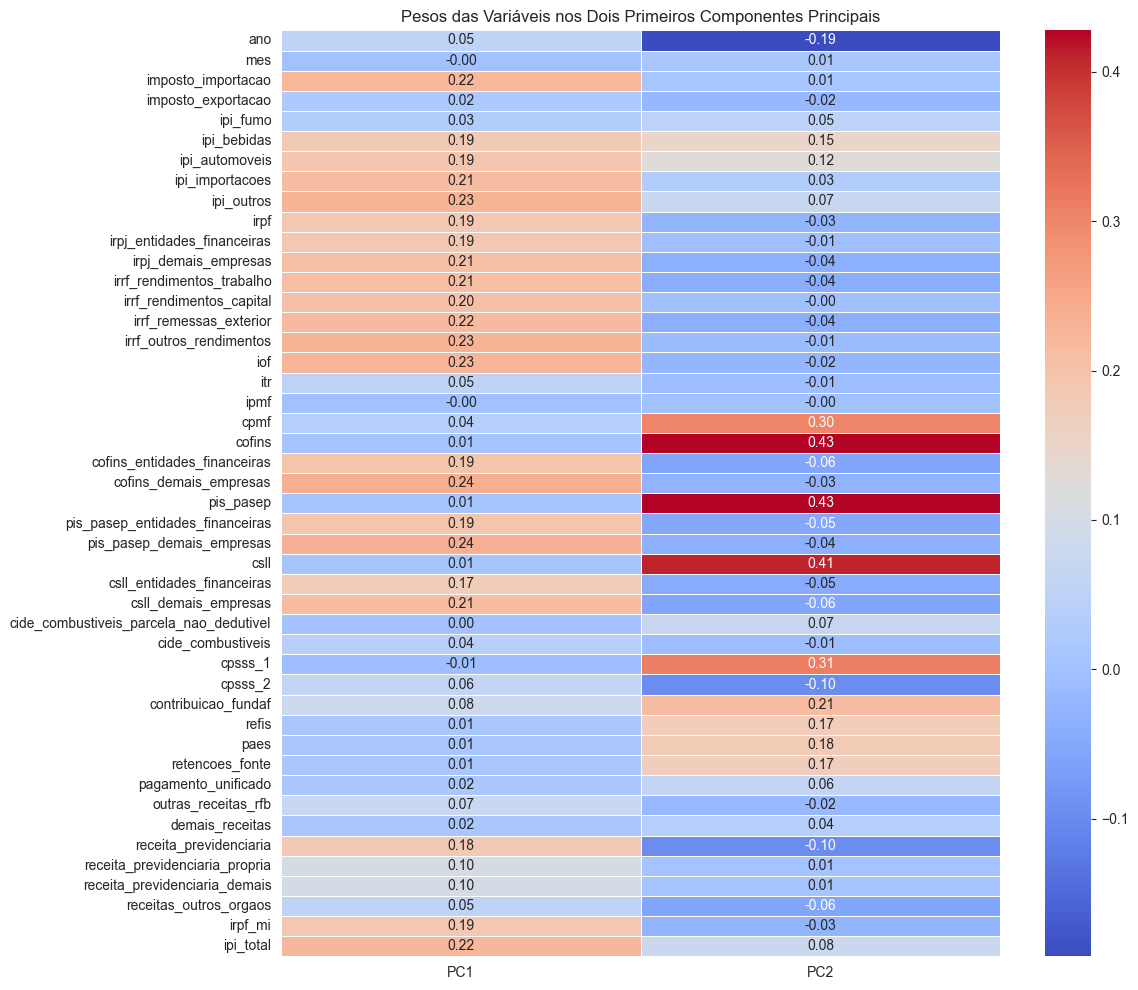

In [167]:
# Visualizar os loadings para os dois primeiros componentes
plt.figure(figsize=(12, 10))
loadings_pc1_pc2 = loadings.iloc[:, 0:2]
loadings_pc1_pc2.columns = ['PC1', 'PC2']

# Heatmap dos loadings
sns.heatmap(loadings_pc1_pc2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pesos das Variáveis nos Dois Primeiros Componentes Principais')
plt.tight_layout()

In [168]:
# Calcular os scores (coordenadas das observações nos componentes principais)
pca_df = pd.DataFrame(
    data=X_pca[:, 0:2],
    columns=['PC1', 'PC2']
)
pca_df['Estado'] = df['sigla_uf']

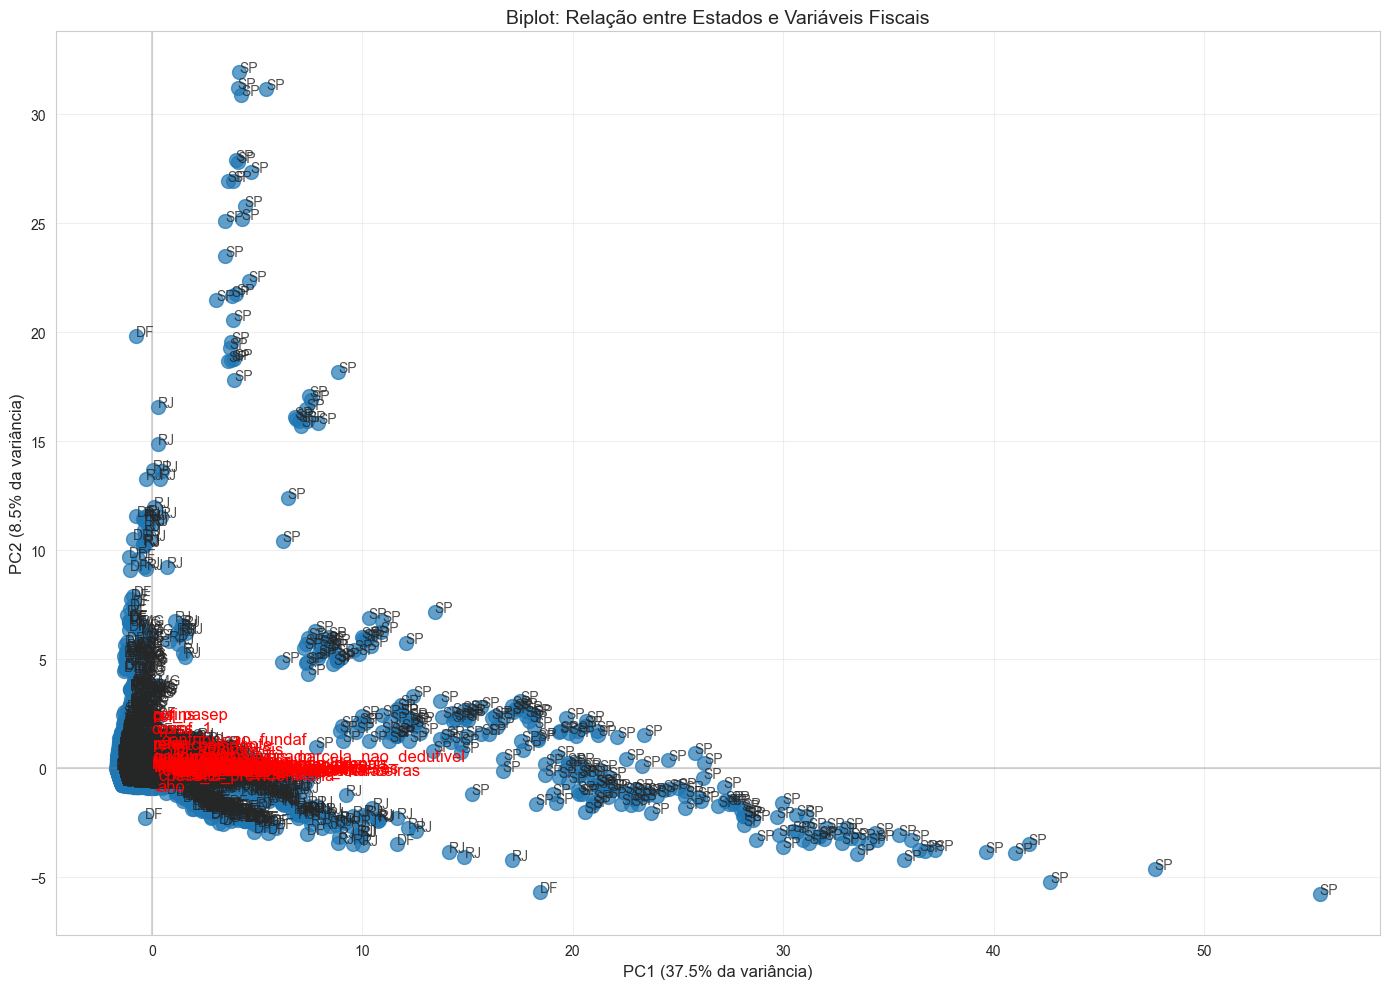

In [ ]:
# Criar biplot
plt.figure(figsize=(14, 10))
# Plotar os scores (estados)
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, s=100)

# Adicionar os nomes dos estados
for i, txt in enumerate(pca_df['Estado']):
    plt.annotate(txt, (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]), fontsize=10, alpha=0.8)

# Adicionar os loadings (setas indicando as variáveis)
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, 
              loadings.iloc[i, 0] * 5,  # Multiplicador para visualização
              loadings.iloc[i, 1] * 5,  
              head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    plt.text(loadings.iloc[i, 0] * 5.3, loadings.iloc[i, 1] * 5.3, feature, fontsize=12, color='red')

plt.grid(alpha=0.3)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
plt.title('Biplot: Relação entre Estados e Variáveis Fiscais', fontsize=14)
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.1%} da variância)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.1%} da variância)', fontsize=12)
plt.tight_layout()


In [170]:
# Determinar quantos componentes são necessários para explicar pelo menos 80% da variância
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1

# Identificar as variáveis mais importantes em cada componente principal
num_top_vars = 3  # Número de variáveis top a serem destacadas
important_variables = {}

for i in range(min(3, n_components)):  # Analisar os 3 primeiros componentes ou menos
    pc_loadings = abs(loadings[f'PC{i+1}'])
    top_vars = pc_loadings.sort_values(ascending=False).head(num_top_vars)
    important_variables[f'PC{i+1}'] = top_vars.index.tolist()

print(f"\nNúmero de componentes necessários para explicar 80% da variância: {n_components_80}")
print("\nVariáveis mais importantes em cada componente principal:")
for pc, vars in important_variables.items():
    print(f"{pc}: {', '.join(vars)}")



Número de componentes necessários para explicar 80% da variância: 12

Variáveis mais importantes em cada componente principal:
PC1: cofins_demais_empresas, pis_pasep_demais_empresas, irrf_outros_rendimentos
PC2: pis_pasep, cofins, csll
PC3: paes, refis, retencoes_fonte


In [171]:
# Calcular a contribuição de cada variável para cada componente
contributions = loadings ** 2
for col in contributions.columns:
    contributions[col] = contributions[col] / contributions[col].sum() * 100

print("\nContribuição percentual de cada variável para os componentes principais:")
print(contributions)


Contribuição percentual de cada variável para os componentes principais:
                                                  PC1           PC2  \
ano                                      2.927243e-01  3.688785e+00   
mes                                      3.823735e-06  1.876552e-02   
imposto_importacao                       4.841712e+00  7.979429e-03   
imposto_exportacao                       3.901692e-02  3.259788e-02   
ipi_fumo                                 8.109735e-02  2.449751e-01   
ipi_bebidas                              3.440251e+00  2.259150e+00   
ipi_automoveis                           3.663886e+00  1.536316e+00   
ipi_importacoes                          4.487096e+00  8.707433e-02   
ipi_outros                               5.174281e+00  4.982096e-01   
irpf                                     3.586224e+00  7.143142e-02   
irpj_entidades_financeiras               3.556190e+00  2.961019e-03   
irpj_demais_empresas                     4.345810e+00  1.394202e-01   
irr

In [ ]:
# Calcular a contribuição de cada variável para cada componente
contributions = loadings ** 2
for col in contributions.columns:
    contributions[col] = contributions[col] / contributions[col].sum() * 100

print("\nContribuição percentual de cada variável para os componentes principais:")
print(contributions)

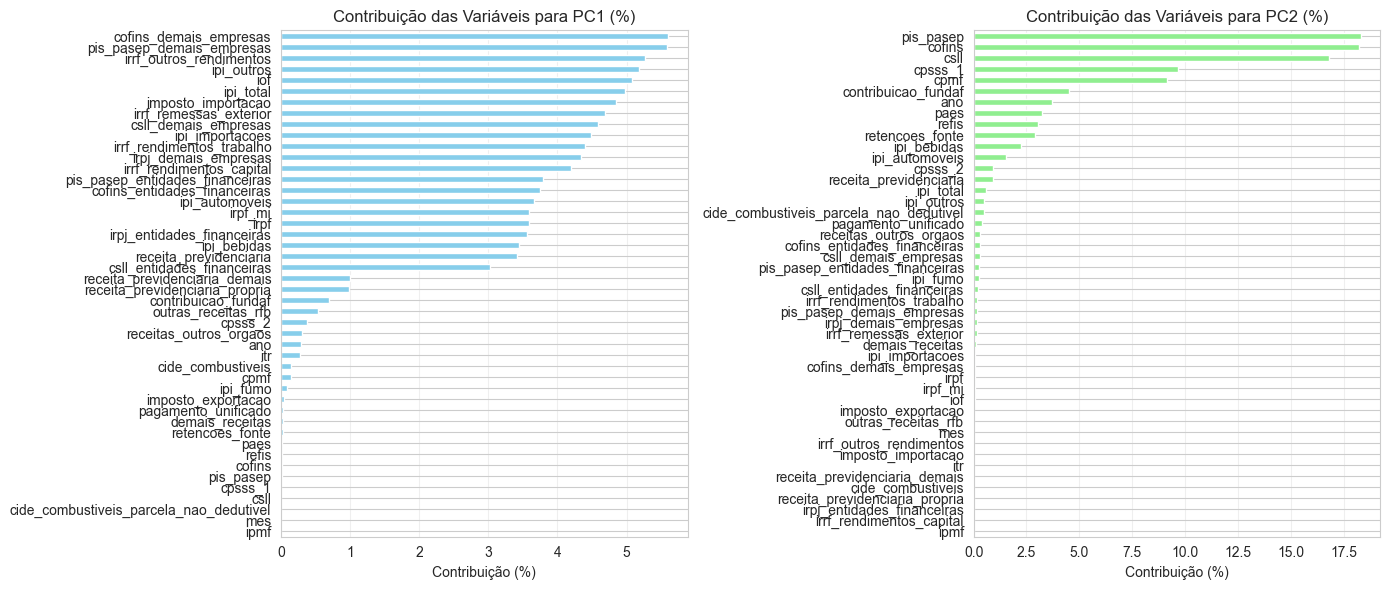

In [172]:
# Visualizar as contribuições para os dois primeiros componentes
plt.figure(figsize=(14, 6))
contributions_pc1_pc2 = contributions.iloc[:, 0:2]
contributions_pc1_pc2.columns = ['PC1', 'PC2']

plt.subplot(1, 2, 1)
contributions_pc1_pc2['PC1'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Contribuição das Variáveis para PC1 (%)')
plt.xlabel('Contribuição (%)')
plt.grid(axis='x', alpha=0.3)

plt.subplot(1, 2, 2)
contributions_pc1_pc2['PC2'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Contribuição das Variáveis para PC2 (%)')
plt.xlabel('Contribuição (%)')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()

In [173]:
# Resumo final com interpretação
print("\n=== RESUMO DA ANÁLISE PCA ===")
print(f"Total de variância explicada pelos dois primeiros componentes: {(explained_variance_ratio[0] + explained_variance_ratio[1])*100:.2f}%")
print(f"Variáveis com maior peso no primeiro componente (PC1): {', '.join(important_variables['PC1'])}")
print(f"Variáveis com maior peso no segundo componente (PC2): {', '.join(important_variables['PC2'])}")
print(f"Número de componentes necessários para explicar 80% da variância: {n_components_80}")


=== RESUMO DA ANÁLISE PCA ===
Total de variância explicada pelos dois primeiros componentes: 45.92%
Variáveis com maior peso no primeiro componente (PC1): cofins_demais_empresas, pis_pasep_demais_empresas, irrf_outros_rendimentos
Variáveis com maior peso no segundo componente (PC2): pis_pasep, cofins, csll
Número de componentes necessários para explicar 80% da variância: 12
